In [12]:
import sys, os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../../..')
from src import raw_data_path, direcslist, load_image, ImageQuant2
%matplotlib widget

### Data paths

In [13]:
basepath = raw_data_path + 'Imaging/mlc-4'
paths = direcslist(basepath, 1)

### Extract data from paths

In [14]:
dates = []
lines = []
embryo_ids = []
for p in paths:
    code = p.strip('/').split('/')[-2]
    dates.append(code.split('_')[0])
    lines.append(code.split('_')[1])
    embryo_ids.append(int(os.path.getmtime(glob.glob(p + '/*488 SP 535-50*')[0])))
df = pd.DataFrame({'Path': paths, 'EmbryoID': embryo_ids, 'Line': lines, 'Date': dates})
df = df[df.Line.isin(['lp637', 'nwg240', 'nwg338', 'nwg376'])]
df.to_csv('../../../data/mlc4_df.csv')

### Segment

In [15]:
# results = []
# for index, row in df.iterrows():
#     print(row.Path)
    
#     # Import movie
#     img = load_image(row.Path + '/af_corrected.tif')
#     roi = np.loadtxt(row.Path + '/ROI_fit_anaphase.txt')
    
#     # Run quantification
#     iq = ImageQuant2(img=img, roi=roi)
#     iq.segment()
    
#     # Save ROIs
#     for i, r in enumerate(iq.roi):
#         np.savetxt(row.Path + '/ROI_fit_%s.txt' % i, r)

### Import quantification model

In [16]:
membg = np.loadtxt('../../../data/calibration_mem6.txt')
cytbg = np.loadtxt('../../../data/calibration_cyt.txt')
calibration_factor = np.loadtxt('../../../data/calibration_constants.txt')[6]
print(calibration_factor)

3.1041166403927325


### Loop through embryos and quantify

/Users/blandt/Desktop/PaperData/Imaging/mlc-4/220504_nwg376_2205031400mlc4_tom4,15,60/00


100%|██████████| 1000/1000 [00:15<00:00, 65.36it/s]


/Users/blandt/Desktop/PaperData/Imaging/mlc-4/220504_nwg376_2205031400mlc4_tom4,15,60/01


  0%|          | 0/1000 [00:00<?, ?it/s]

/Users/blandt/Desktop/PaperData/Imaging/mlc-4/220504_nwg376_2205031400mlc4_tom4,15,60/02


  0%|          | 0/1000 [00:00<?, ?it/s]

/Users/blandt/Desktop/PaperData/Imaging/mlc-4/220504_nwg376_2205031400mlc4_tom4,15,60/03


100%|██████████| 1000/1000 [00:08<00:00, 118.04it/s]


/Users/blandt/Desktop/PaperData/Imaging/mlc-4/220504_nwg376_2205031400mlc4_tom4,15,60/04


100%|██████████| 1000/1000 [00:08<00:00, 121.24it/s]


/Users/blandt/Desktop/PaperData/Imaging/mlc-4/220505_lp637_2205041200mlc4_tom4,15,60/00


100%|██████████| 1000/1000 [00:09<00:00, 107.64it/s]


/Users/blandt/Desktop/PaperData/Imaging/mlc-4/220505_lp637_2205041200mlc4_tom4,15,60/01


100%|██████████| 1000/1000 [00:13<00:00, 71.78it/s]


/Users/blandt/Desktop/PaperData/Imaging/mlc-4/220505_lp637_2205041200mlc4_tom4,15,60/02


100%|██████████| 1000/1000 [00:14<00:00, 68.11it/s]


/Users/blandt/Desktop/PaperData/Imaging/mlc-4/220505_lp637_2205041200mlc4_tom4,15,60/03


100%|██████████| 1000/1000 [00:13<00:00, 74.83it/s]


/Users/blandt/Desktop/PaperData/Imaging/mlc-4/220505_lp637_2205041200mlc4_tom4,15,60/04


100%|██████████| 1000/1000 [00:10<00:00, 97.58it/s]


/Users/blandt/Desktop/PaperData/Imaging/mlc-4/220505_lp637_2205041200mlc4_tom4,15,60/05


  0%|          | 0/1000 [00:00<?, ?it/s]

/Users/blandt/Desktop/PaperData/Imaging/mlc-4/220505_lp637_2205041200mlc4_tom4,15,60/06


100%|██████████| 1000/1000 [00:06<00:00, 157.52it/s]


/Users/blandt/Desktop/PaperData/Imaging/mlc-4/220505_lp637_2205041200mlc4_tom4,15,60/07


100%|██████████| 1000/1000 [00:13<00:00, 75.43it/s]


/Users/blandt/Desktop/PaperData/Imaging/mlc-4/220505_nwg376_2205041000mlc4_tom4,15,60/00


100%|██████████| 1000/1000 [00:07<00:00, 140.55it/s]


/Users/blandt/Desktop/PaperData/Imaging/mlc-4/220505_nwg376_2205041000mlc4_tom4,15,60/01


100%|██████████| 1000/1000 [00:07<00:00, 138.14it/s]


/Users/blandt/Desktop/PaperData/Imaging/mlc-4/220505_nwg376_2205041000mlc4_tom4,15,60/02


100%|██████████| 1000/1000 [00:07<00:00, 136.04it/s]


/Users/blandt/Desktop/PaperData/Imaging/mlc-4/220505_nwg376_2205041000mlc4_tom4,15,60/03


100%|██████████| 1000/1000 [00:06<00:00, 158.13it/s]


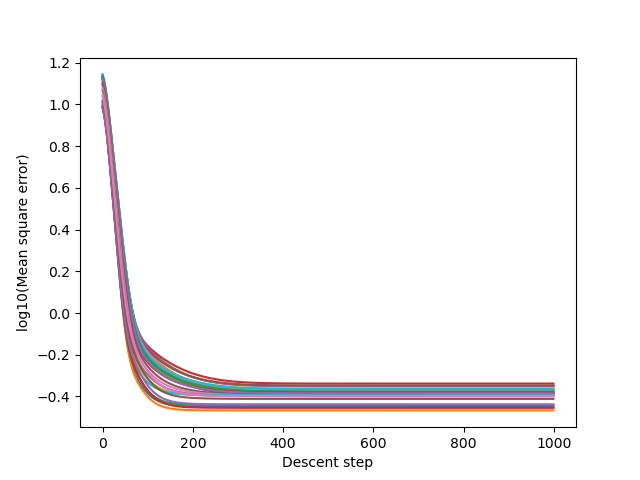

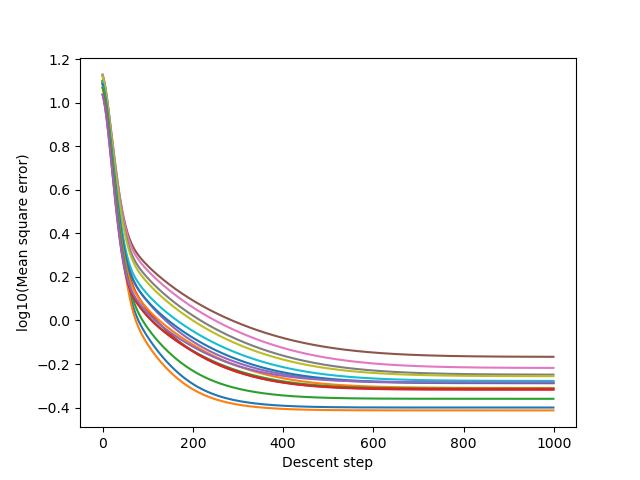

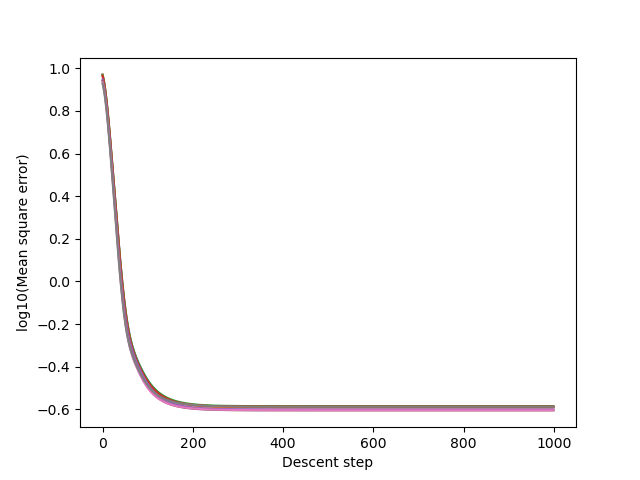

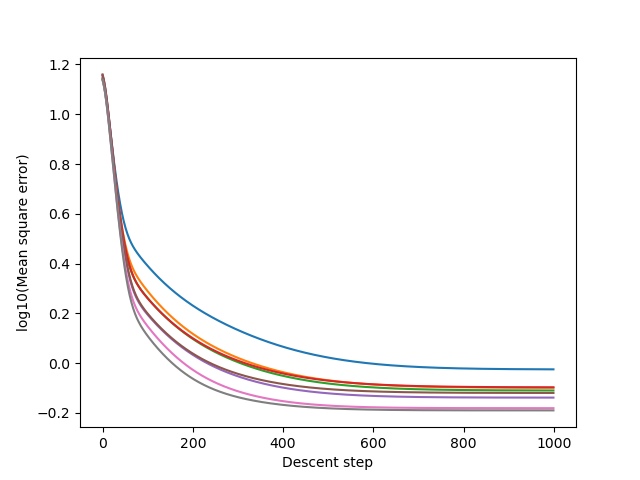

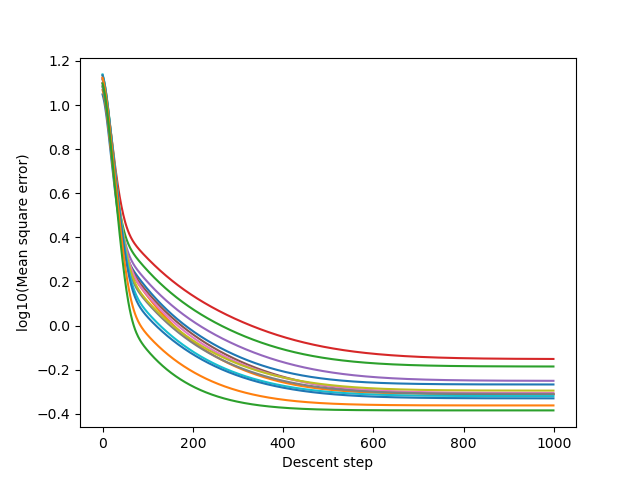

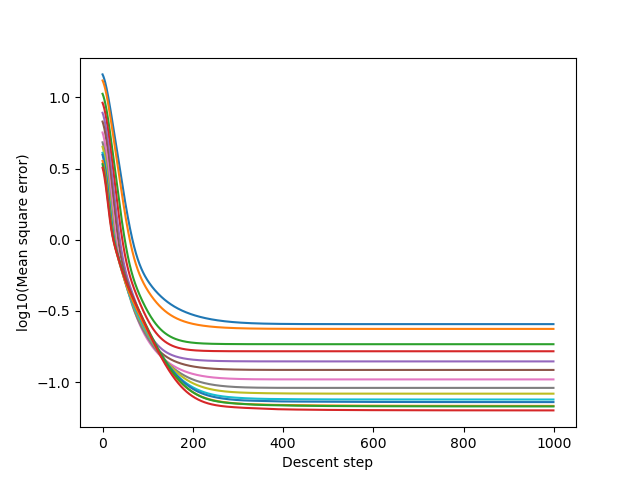

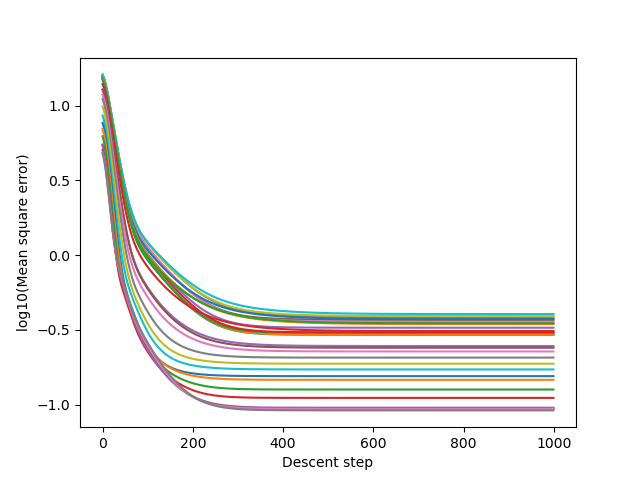

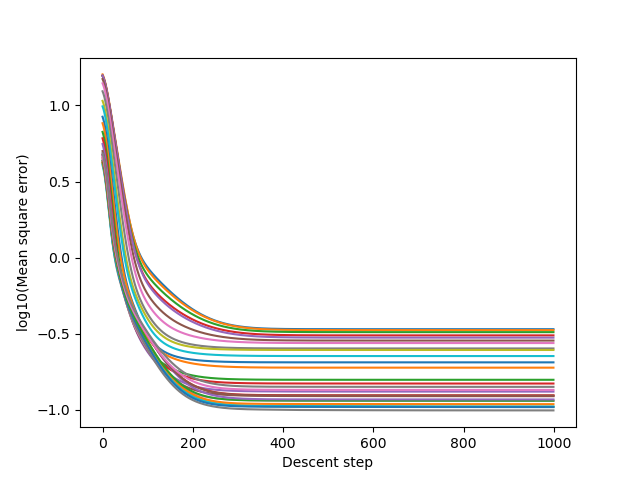

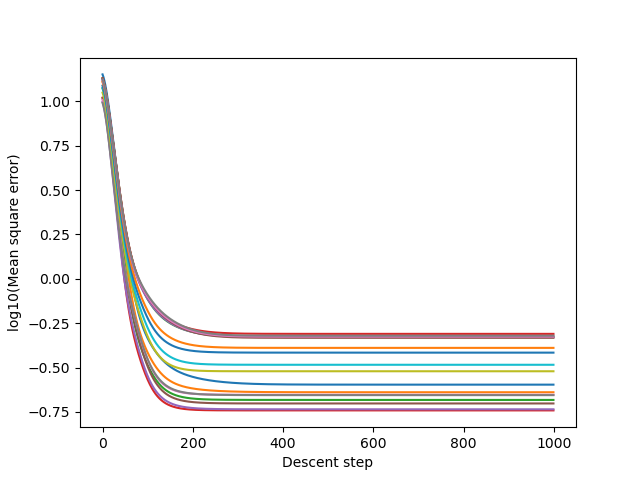

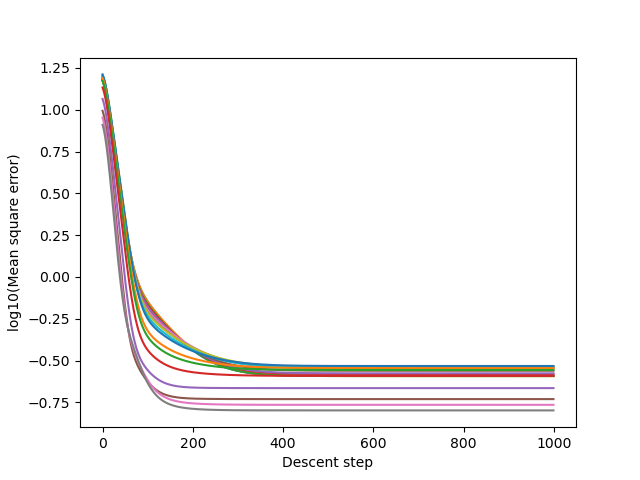

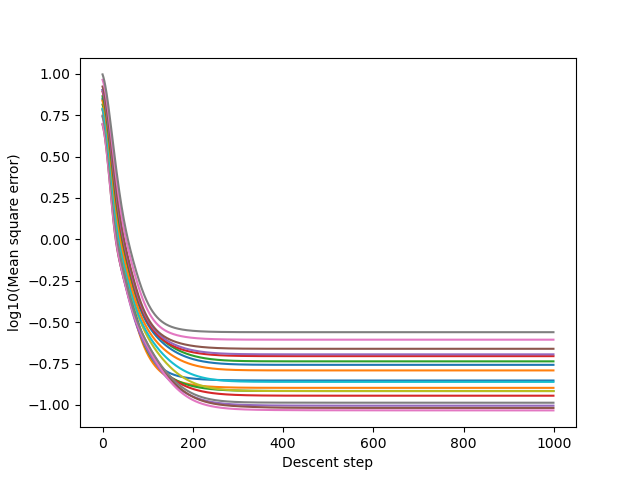

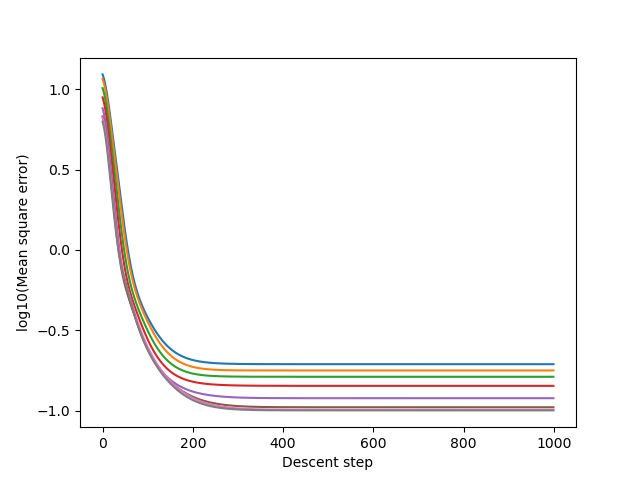

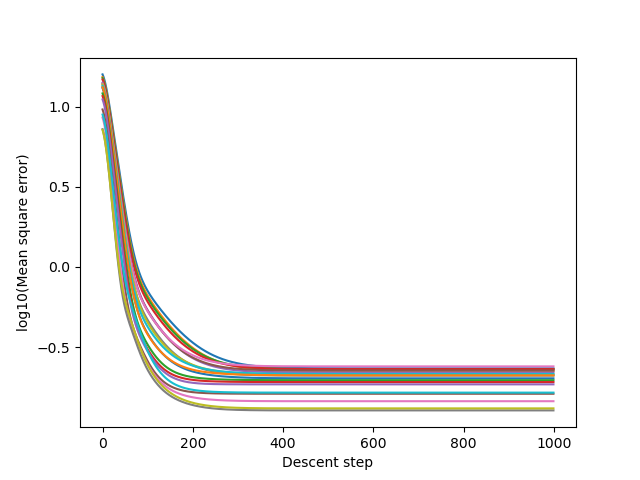

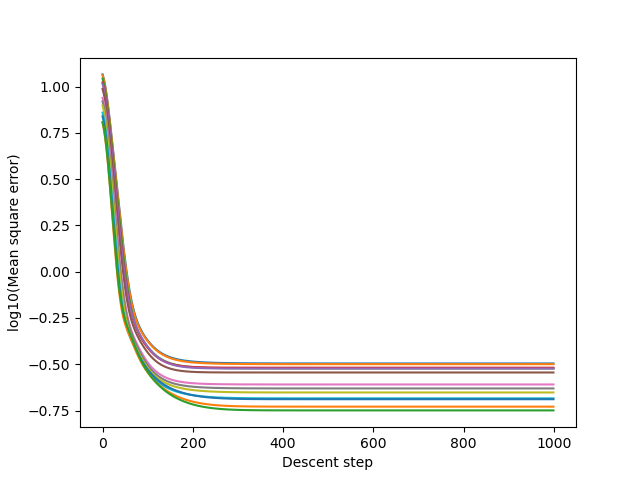

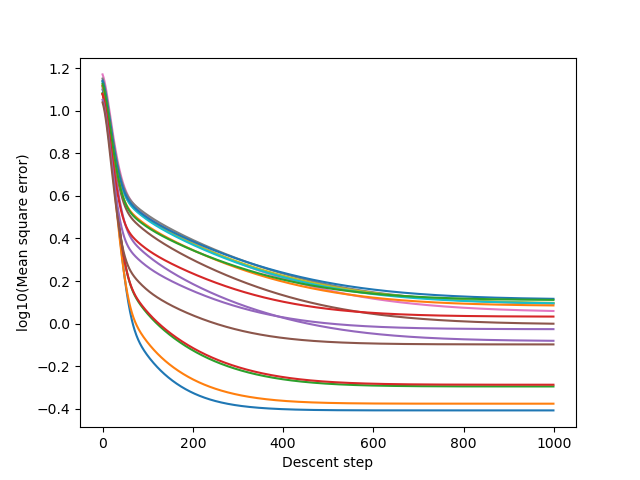

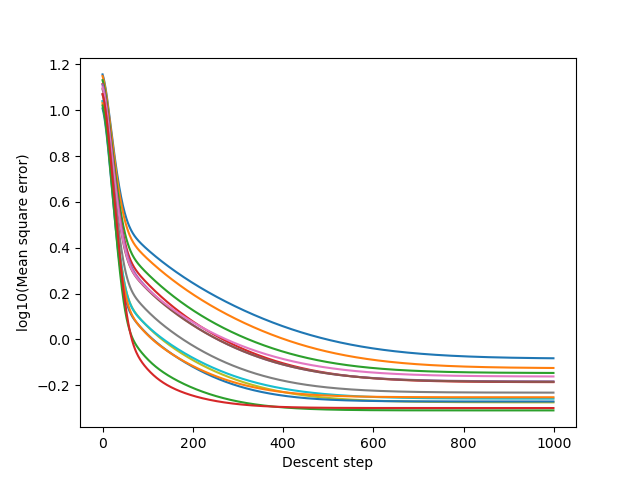

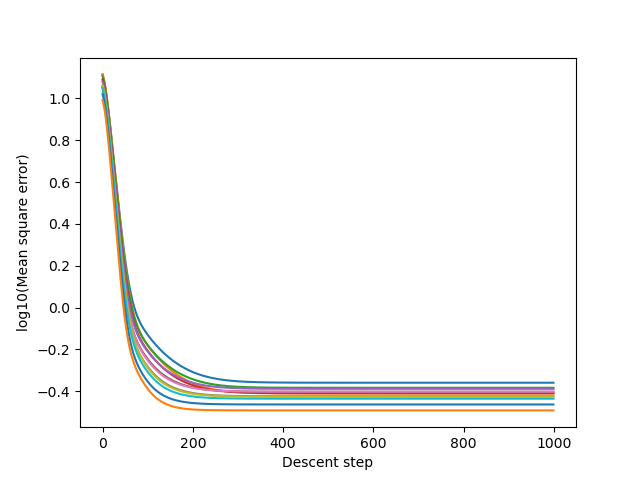

In [17]:
results = []
for index, row in df.iterrows():
    print(row.Path)
    
    # Import movie
    img = load_image(row.Path + '/af_corrected.tif')
    roi = [np.loadtxt(row.Path + '/ROI_fit_%s.txt' % i) for i in range(img.shape[0])]
    
    # Run quantification
    iq = ImageQuant2(img=img, roi=roi, cytbg=cytbg, membg=membg)
    iq.quantify(descent_steps=1000)
    iq.plot_losses(log=True)
    
    # Compile results
    res = iq.compile_res(ids=row.EmbryoID * np.ones(iq.nimgs), extra_columns={'Frame': np.arange(iq.nimgs)})
    res['Membrane signal'] *= calibration_factor
    res = res.astype({'Frame': int})
    results.append(res)

### Combine dataframes

In [18]:
results_full = pd.concat(results)
results_full.to_csv('../../../data/mlc4_res.csv')

### Filter out polar body

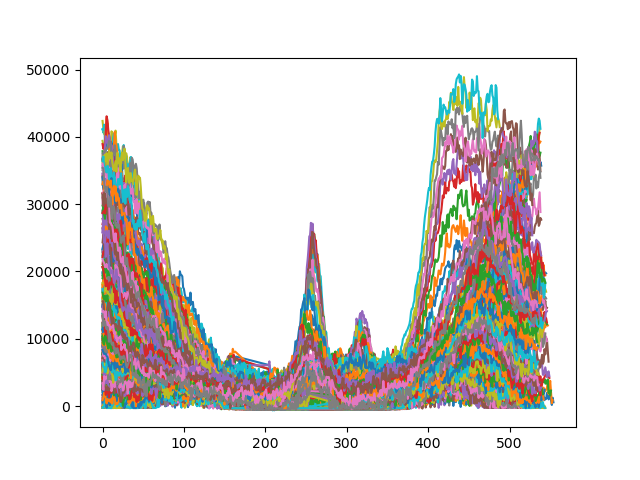

In [19]:
def nan_helper(y):
    return np.isnan(y), lambda z: z.nonzero()[0]

fig, ax = plt.subplots()
results_full = pd.read_csv('../../../data/mlc4_res.csv')
res_grouped = results_full.groupby(['EmbryoID', 'Frame'])
for i, (g, r) in enumerate(res_grouped):
    path = df[df.EmbryoID == g[0]]['Path'].values[0]
    roi = np.loadtxt(path + '/ROI_fit_%s.txt' % g[1])
    _mems = r['Membrane signal']
    mems = _mems.to_numpy()
    if os.path.exists(path + '/polar_body.txt'):
        polar_body = np.loadtxt(path + '/polar_body.txt')
        ind = int(mems.shape[0] * np.argmin(np.linalg.norm(roi - polar_body, axis=1)) / roi.shape[0])
        mems[ind-20:ind+20] = np.nan
        nans, x = nan_helper(mems)
        mems[nans] = np.interp(x(nans), x(~nans), mems[~nans])  
    ax.plot(mems)
    results_full.loc[_mems.index, 'Membrane signal'] = mems
results_full.to_csv('../../../data/mlc4_res_no_pb.csv')